<a href="https://colab.research.google.com/github/merdogan97/Machine-Learning-ML-/blob/main/ML_19_(PCA_with_Supervised_Algorithms).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA with Supervised Algorithms**

# **Imports**

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.pyplot import matplotlib
plt.rcParams["figure.figsize"] = (10,6)

In [68]:
df = pd.read_csv("Wine.csv")

In [69]:
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
114,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385,2
35,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920,1
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515,2
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,2
76,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392,2
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830,3
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,1
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450,2
33,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235,1
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695,3


In [70]:
df.shape

(178, 14)

In [71]:
df.Customer_Segment.unique()

array([1, 2, 3])

In [72]:
df.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

AttributeError: ignored

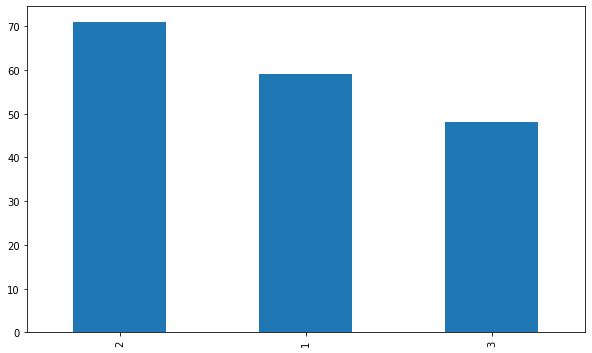

In [73]:
ax = df.Customer_Segment.value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

In [75]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


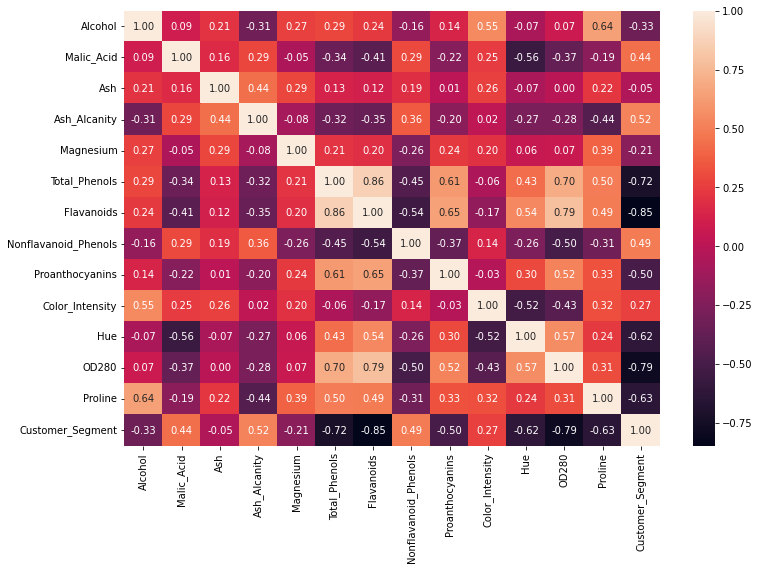

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f")

AttributeError: ignored

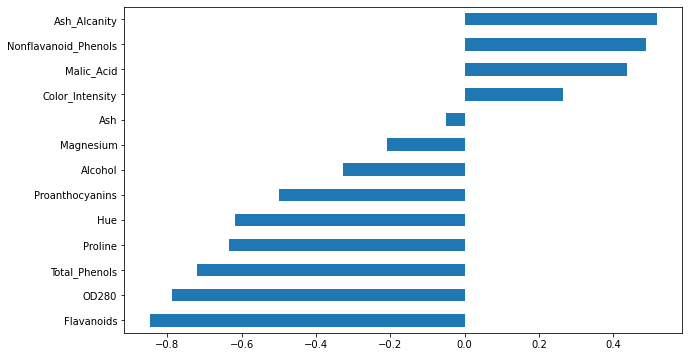

In [77]:
ax = df.corr()["Customer_Segment"][:-1].sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f");

In [ ]:
df.isnull().sum().any()

# **Split the Data**

In [ ]:
X = df.drop("Customer_Segment", axis = 1)

In [ ]:
y = df["Customer_Segment"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

## Modeling with Random Forest

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, y_train)
eval_metric(classifier, X_train, y_train, X_test, y_test)

Test_Set
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Train_Set
[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [83]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(random_state = 0)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.971905
test_precision_micro    0.971905
test_recall_micro       0.971905
test_f1_micro           0.971905
dtype: float64

In [84]:
classifier.feature_importances_

array([0.12930939, 0.02858818, 0.01005337, 0.02107876, 0.02670528,
       0.04826478, 0.17041694, 0.01237242, 0.01801449, 0.17606478,
       0.06869346, 0.09987653, 0.19056163])

In [85]:
feats = pd.DataFrame(index=df.iloc[:,:-1].columns, data= classifier.feature_importances_, 
                     columns=['Importance'])
imp_feats = feats.sort_values("Importance")
imp_feats

,Importance
Ash,0.010053
Nonflavanoid_Phenols,0.012372
Proanthocyanins,0.018014
Ash_Alcanity,0.021079
Magnesium,0.026705
Malic_Acid,0.028588
Total_Phenols,0.048265
Hue,0.068693
OD280,0.099877
Alcohol,0.129309


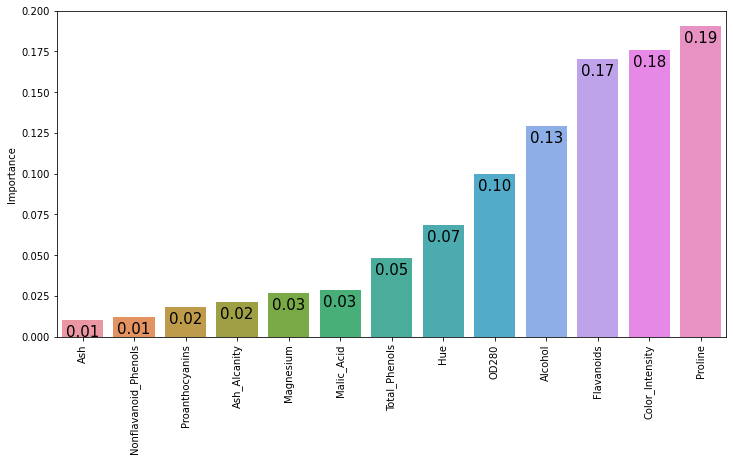

In [86]:
plt.figure(figsize=(12,6))
splot = sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

# **Remodelling by feature importance**

In [87]:
X2 = df[["Proline", "Color_Intensity", "Flavanoids"]]

In [88]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2, stratify=y, random_state = 0)

In [89]:
classifier2 = RandomForestClassifier(random_state = 0)
classifier2.fit(X_train2, y_train2)
eval_metric(classifier2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


Train_Set
[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [90]:
model = RandomForestClassifier(random_state = 0)

scores = cross_validate(model, X_train2, y_train2, scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.957619
test_precision_micro    0.957619
test_recall_micro       0.957619
test_f1_micro           0.957619
dtype: float64

# **PCA**

# **Scaling Data**

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

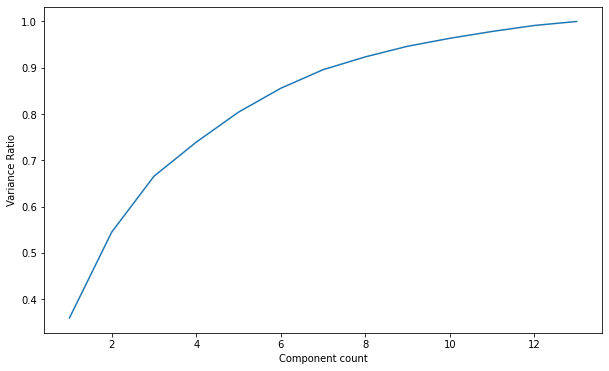

In [94]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)
x = range(1,14)                   #14 feature var
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [95]:
pca = PCA(n_components=13).fit(X_train_scaled)  #13 ile de deneyelim

In [96]:
my_dict = {"explained_variance":pca.explained_variance_, 
           "explained_variance_ratio":pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

In [97]:
df_ev = pd.DataFrame(my_dict, index = range(1,14))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,4.706713,0.359505,0.359505
2,2.428244,0.185473,0.544978
3,1.580507,0.120721,0.665699
4,0.964060,0.073636,0.739335
5,0.848632,0.064820,0.804155
6,0.675462,0.051593,0.855748
7,0.524426,0.040056,0.895804
8,0.363173,0.027740,0.923544
9,0.300204,0.022930,0.946474
10,0.224731,0.017165,0.963639


In [98]:
pca = PCA(n_components = 3)       # 0.75 

In [99]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [100]:
df_pca_train = pd.DataFrame(X_train_pca)
df_pca_train = df_pca_train.rename(columns={0:"first_component", 1:"second_component", 2:"third_component"})
df_pca_train.head()

,first_component,second_component,third_component
0,-0.783937,-1.590432,0.568115
1,-1.792083,0.583400,-1.321347
2,2.101051,2.109598,0.790712
3,3.107242,0.448619,-1.057832
4,0.725718,-2.107998,0.588435


In [101]:
df_pca_test=pd.DataFrame(X_test_pca)
df_pca_test = df_pca_test.rename(columns={0:"first_component", 1:"second_component", 2:"third_component"})
df_pca_test.head()

,first_component,second_component,third_component
0,0.510682,-1.703429,0.476175
1,-1.431099,0.675556,0.335034
2,1.517576,-1.098461,-1.110562
3,-2.504356,1.651059,-0.292180
4,-0.335949,-2.097911,-2.503081


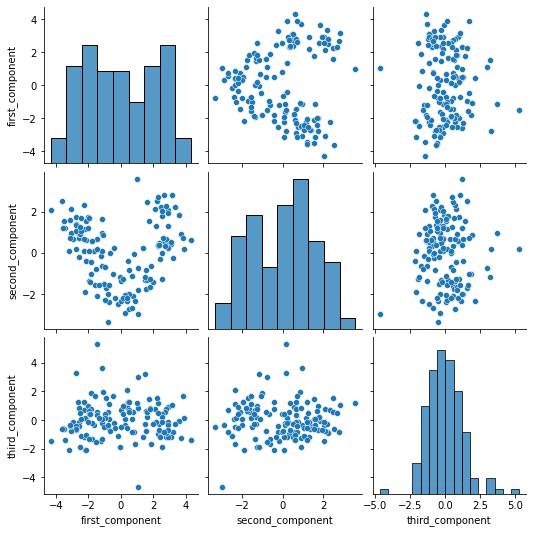

In [102]:
sns.pairplot(df_pca_train)

In [103]:
df_pca_train.corr().round()

,first_component,second_component,third_component
first_component,1.0,-0.0,-0.0
second_component,-0.0,1.0,0.0
third_component,-0.0,0.0,1.0


# **Modelling after PCA**

In [104]:
classifier3 = RandomForestClassifier(random_state = 0, max_depth=2)
classifier3.fit(X_train_pca, y_train)
eval_metric(classifier3, X_train_pca, y_train, X_test_pca, y_test)

Test_Set
[[11  1  0]
 [ 1 13  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36


Train_Set
[[46  1  0]
 [ 3 53  1]
 [ 0  0 38]]
              precision    recall  f1-score   support

           1       0.94      0.98      0.96        47
           2       0.98      0.93      0.95        57
           3       0.97      1.00      0.99        38

    accuracy                           0.96       142
   macro avg       0.96      0.97      0.97       142
weighted avg       0.97      0.96      0.96       142



In [105]:
from sklearn.pipeline import Pipeline

In [106]:
operations = [("scaler", StandardScaler()), ("PCA",PCA(n_components=3)),
              ("RF", RandomForestClassifier(random_state = 0, max_depth=2))]

pipe_model = Pipeline(steps=operations)
                                             
scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]                                            

test_accuracy           0.957143
test_precision_micro    0.957143
test_recall_micro       0.957143
test_f1_micro           0.957143
dtype: float64

# **Interpreting PCA results**

In [107]:
scaled_df = pd.DataFrame(X_train_scaled, columns = df.columns[:-1])

In [108]:
combined_df = pd.concat([df_pca_train, scaled_df], axis=1)
correlation = combined_df.corr()
correlation.head()

,first_component,second_component,third_component,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
first_component,1.000000e+00,-8.268266e-17,-8.112231e-17,-0.315917,0.522374,-0.041560,0.457484,-0.297626,-0.858881,-0.910155,0.647516,-0.661573,0.157077,-0.703526,-0.796406,-0.651453
second_component,-8.268266e-17,1.000000e+00,3.609301e-16,0.759174,0.314529,0.481679,-0.033691,0.471424,0.089916,-0.016412,0.122430,0.060781,0.847400,-0.340077,-0.332120,0.556237
third_component,-8.112231e-17,3.609301e-16,1.000000e+00,-0.250287,0.138850,0.764486,0.798863,0.165145,0.186767,0.187314,0.162821,0.177221,-0.138940,0.042489,0.218051,-0.202532
Alcohol,-3.159174e-01,7.591742e-01,-2.502869e-01,1.000000,0.086124,0.201450,-0.315958,0.249971,0.287509,0.224431,-0.089860,0.123973,0.541419,0.040125,0.023660,0.652054
Malic_Acid,5.223736e-01,3.145289e-01,1.388497e-01,0.086124,1.000000,0.123963,0.272138,-0.071824,-0.313270,-0.384919,0.328954,-0.201117,0.203619,-0.534350,-0.365818,-0.216060


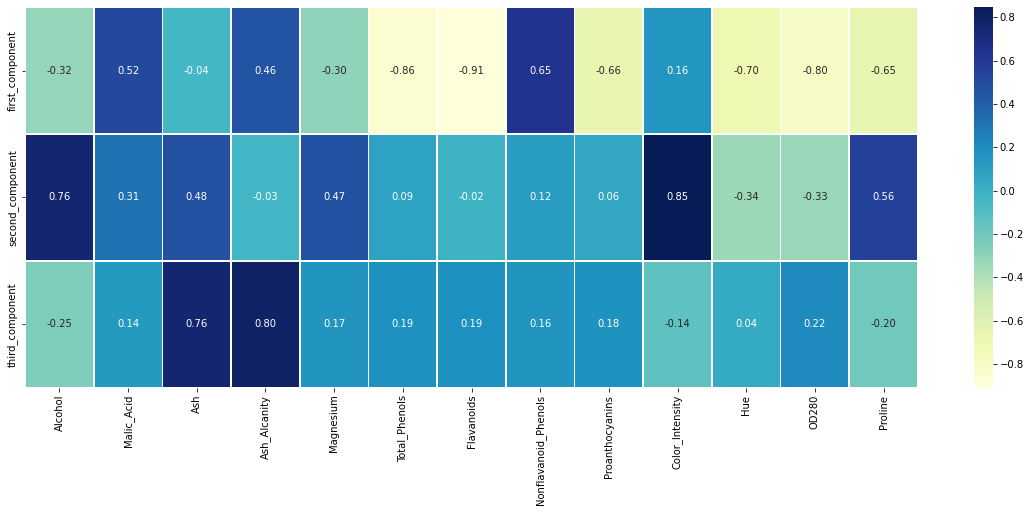

In [109]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:3,3:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

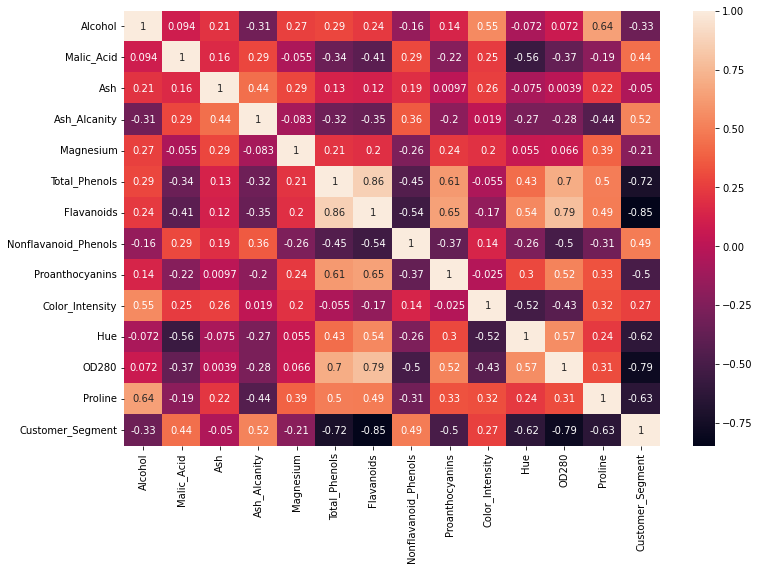

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

In [111]:
import plotly.express as px
fig = px.scatter_3d(x=df_pca_train["first_component"], y=df_pca_train["second_component"], 
                    z=df_pca_train["third_component"], color=y_train)
fig.show()